In [1]:
# !conda install pandas-datareader

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# https://www.kaggle.com/datasets/dhanushnarayananr/credit-card-fraud?resource=download
df = pd.read_csv('data/card_transdata.csv')
df

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


## data preprocessing and eda
- Perform the data exploration step (i.e. evaluate your data, # of observations, details about your data distributions, scales, missing data, column descriptions) Note: For image data you can still describe your data by the number of classes, # of images, plot example classes of the image, size of images, are sizes uniform? Do they need to be cropped? normalized? etc.

No null data

In [4]:
df.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [5]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


Slightly unbalanced fraud class, 8.7% fraud. I will likely use an evaluation metric that punishes false negatives more heavily, so emphasis on recall. The f2 score will likely be used.

In [6]:
# !conda install pandas-datareader

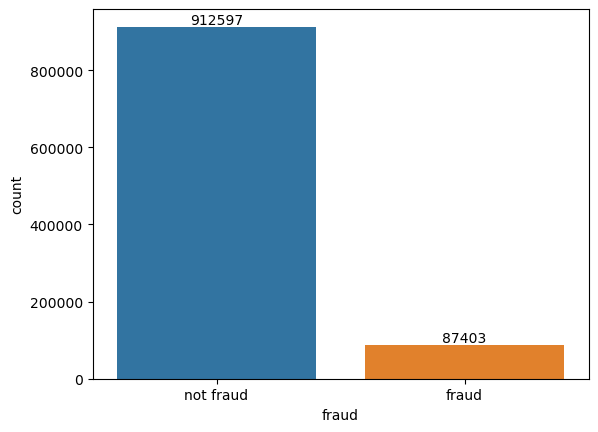

In [7]:
ax = sns.countplot(x='fraud', data=df)
plt.xticks(ticks=[0, 1], labels=['not fraud', 'fraud'])
ax.bar_label(ax.containers[0])
plt.show()

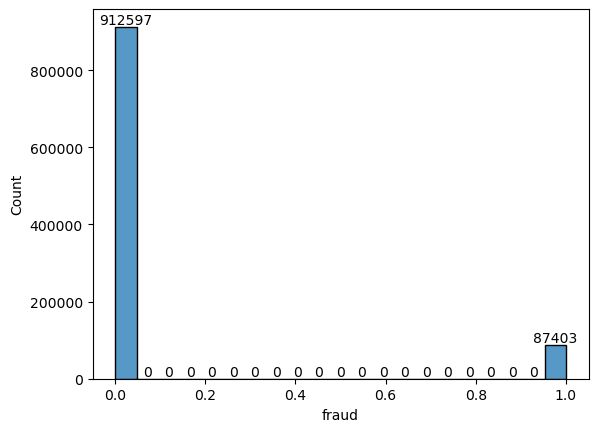

In [8]:
ax = sns.histplot(df['fraud'])
ax.bar_label(ax.containers[0])
plt.show()

In [9]:
sample = df.sample(10000)

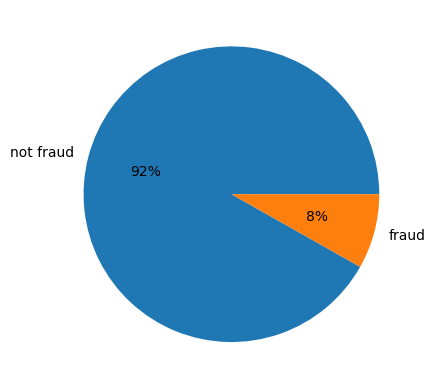

In [10]:
plt.pie(sample['fraud'].value_counts(), labels=['not fraud', 'fraud'], autopct='%.0f%%')
plt.show()

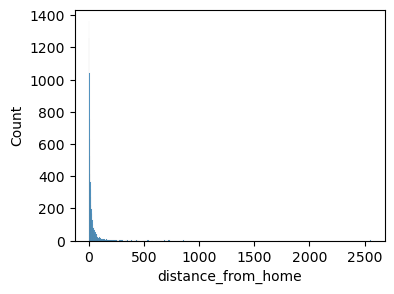

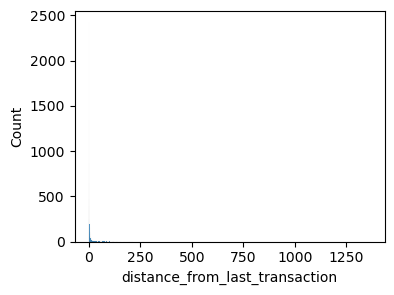

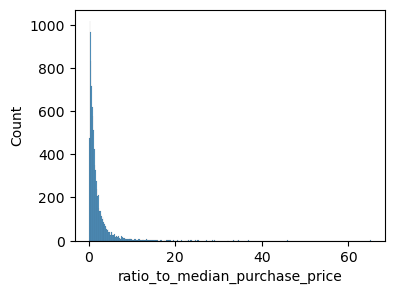

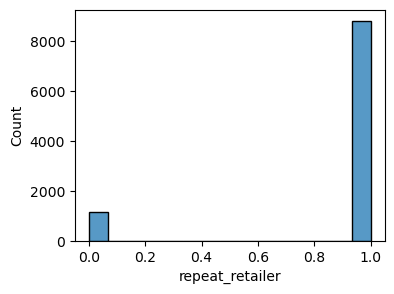

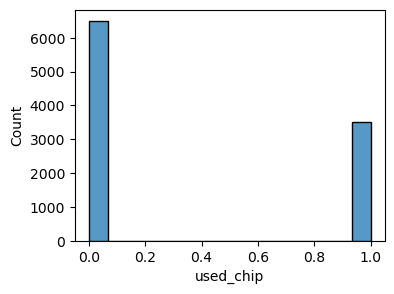

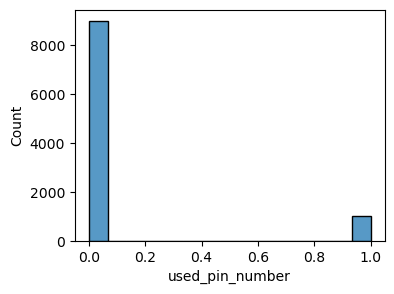

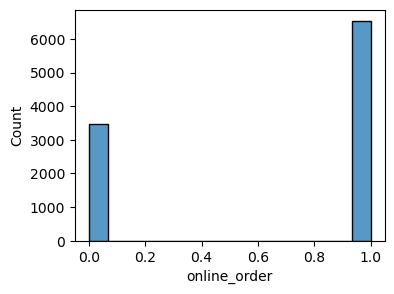

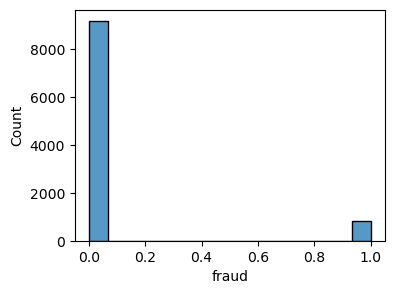

In [11]:
for col in sample.columns:
    plt.figure(figsize=(4, 3))
    sns.histplot(sample[col])
    plt.show()

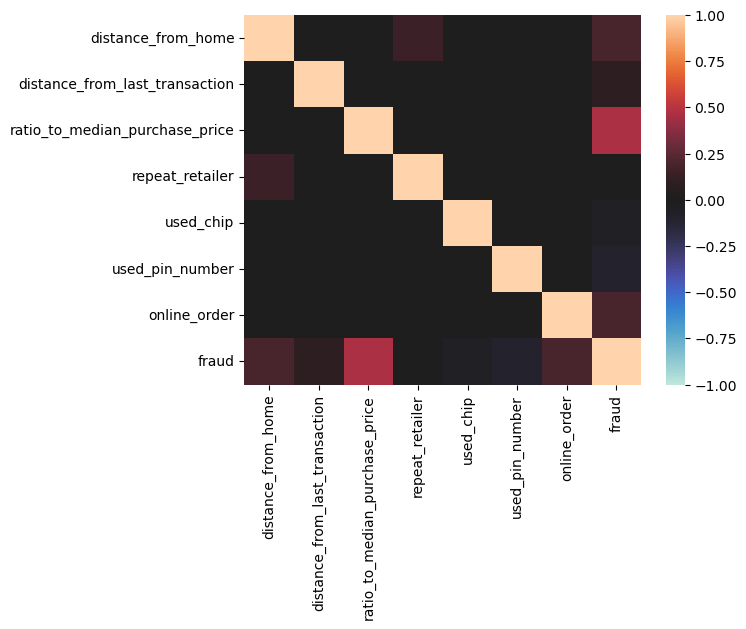

In [12]:
sns.heatmap(df.corr(), vmin=-1, vmax=1, center=0)
plt.show()

I will normalize the data with MinMaxScaler

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler = MinMaxScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
scaled_df

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,0.005443,0.000026,0.007250,1.0,1.0,0.0,0.0,0.0
1,0.001018,0.000015,0.004816,1.0,0.0,0.0,0.0,0.0
2,0.000478,0.000068,0.001581,1.0,0.0,0.0,1.0,0.0
3,0.000211,0.000473,0.001338,1.0,1.0,0.0,1.0,0.0
4,0.004156,0.000048,0.008284,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,0.000207,0.000009,0.006058,1.0,1.0,0.0,0.0,0.0
999996,0.001869,0.000226,0.010358,1.0,1.0,0.0,0.0,0.0
999997,0.000274,0.000124,0.000798,1.0,1.0,0.0,1.0,0.0
999998,0.000400,0.000020,0.001760,1.0,0.0,0.0,1.0,0.0


In [15]:
sample = scaled_df.sample(1000)

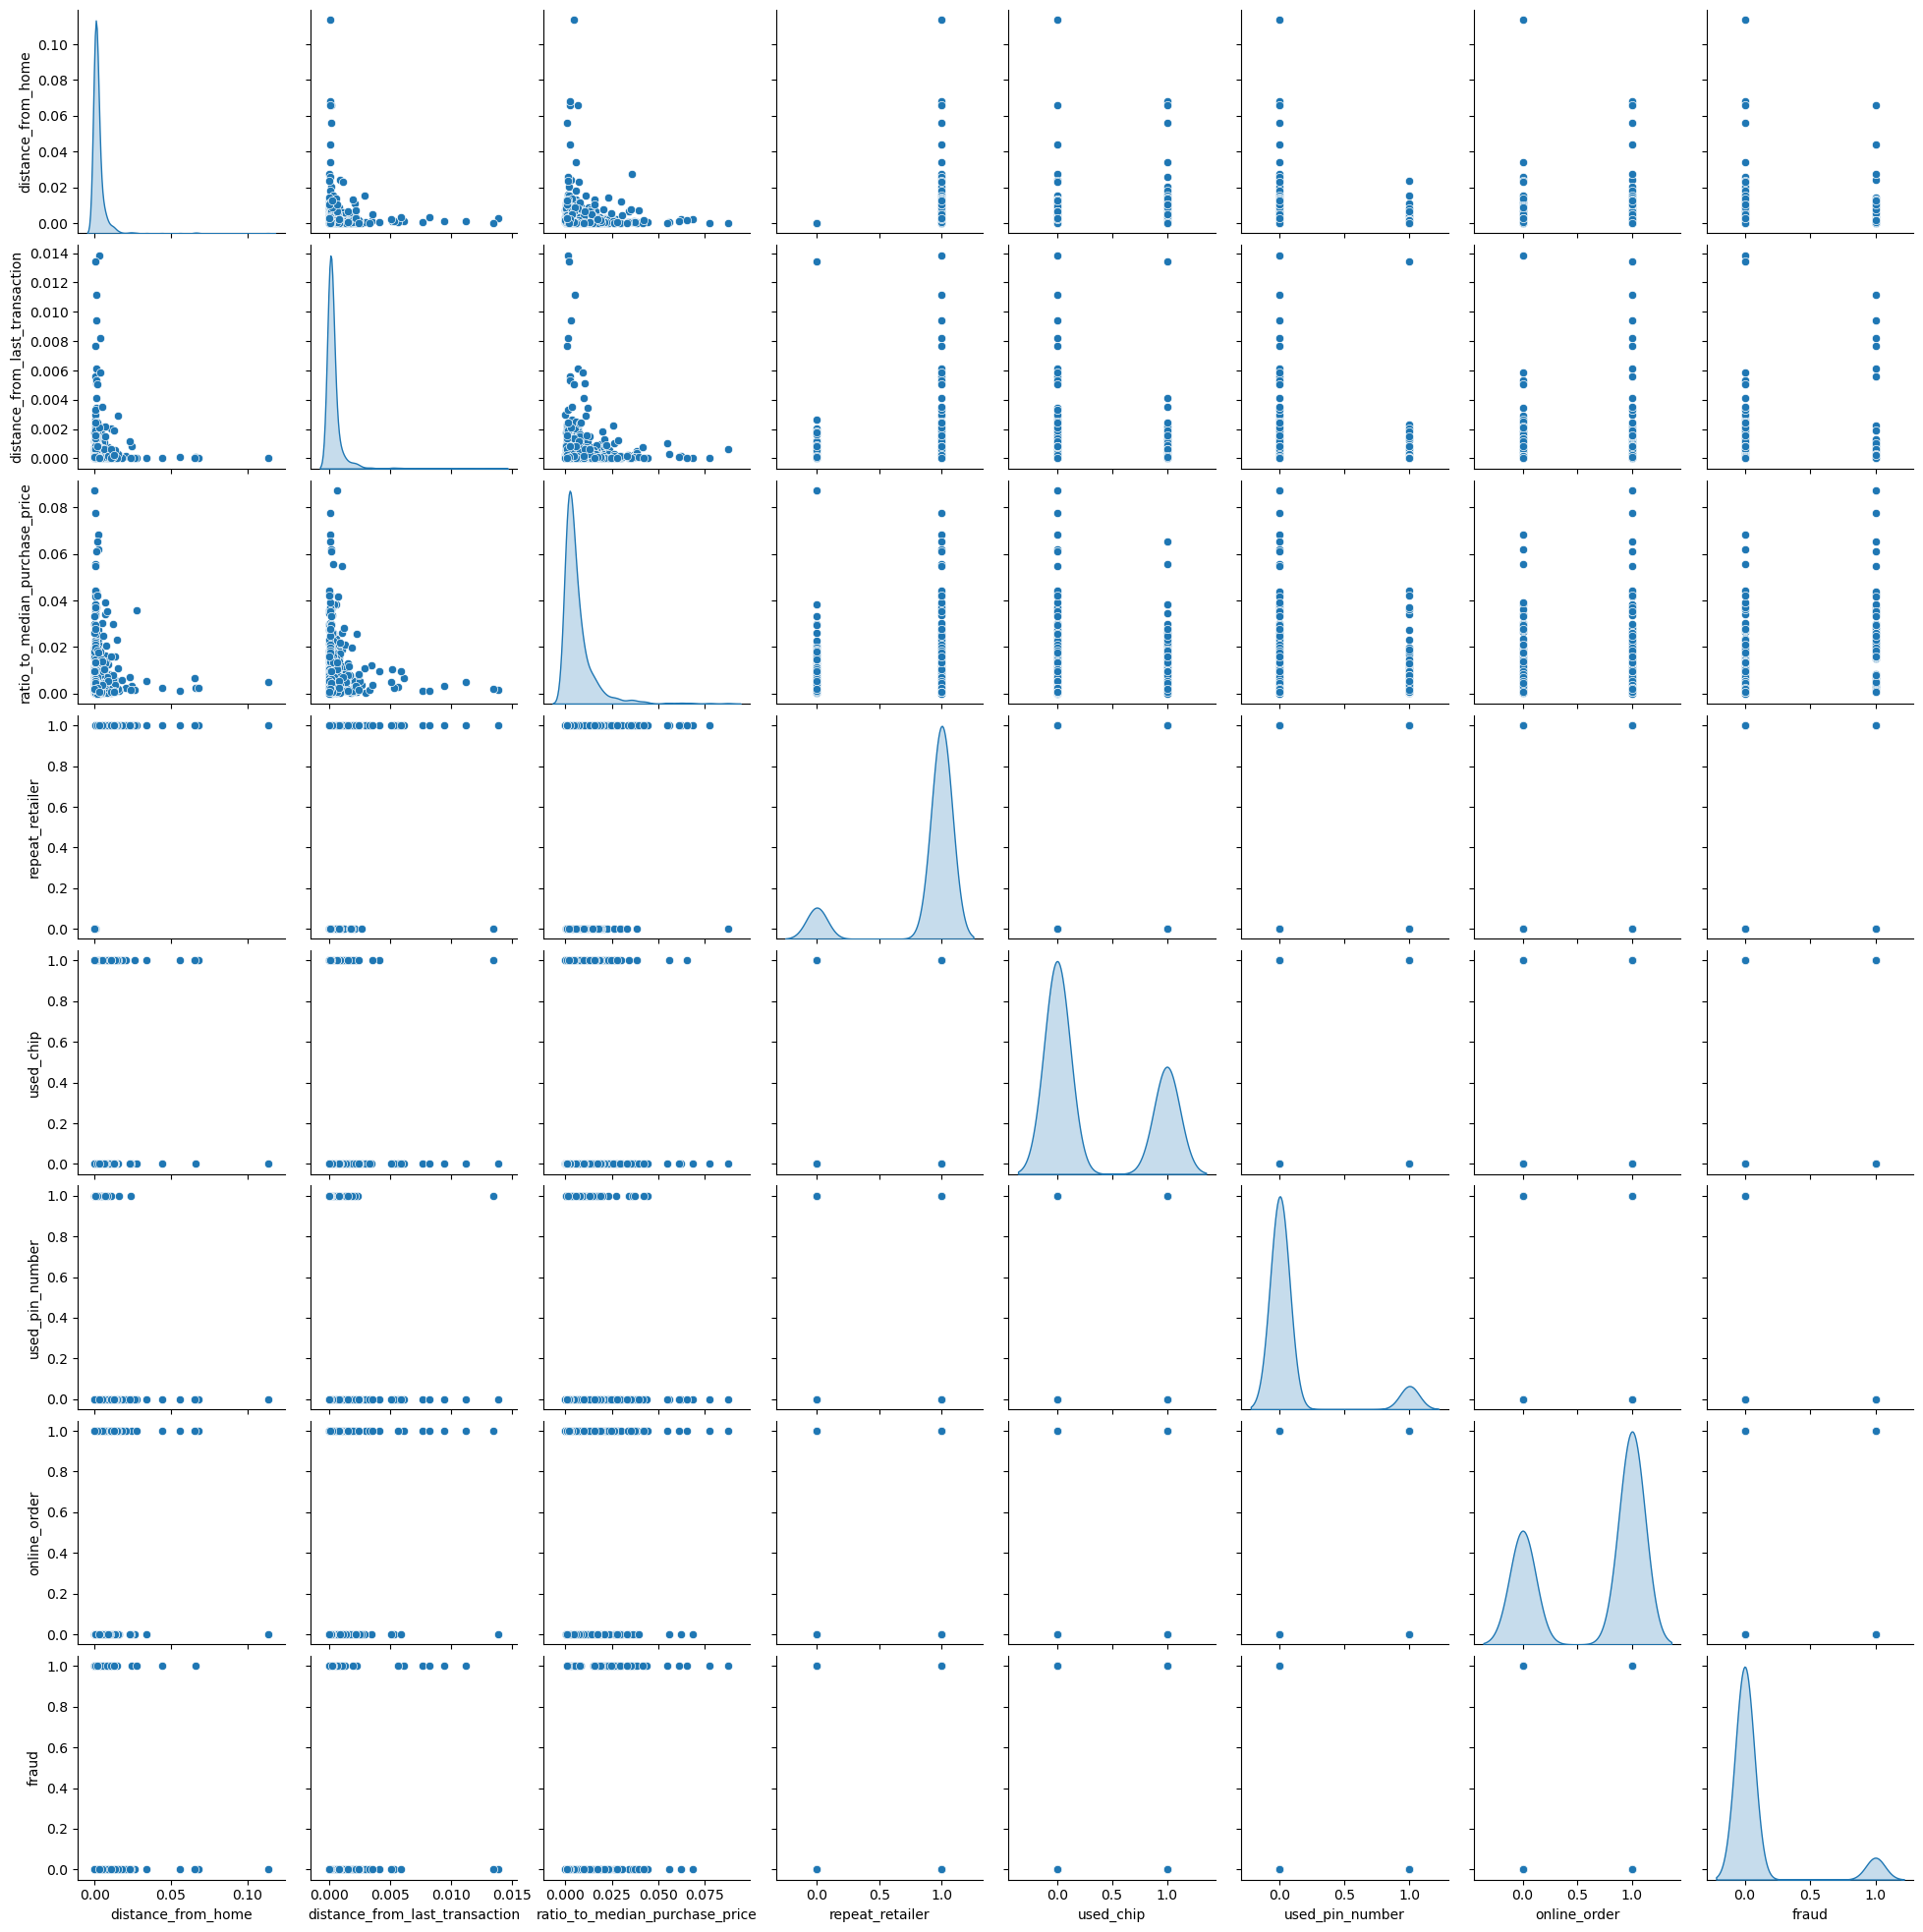

In [16]:
sns.pairplot(sample, diag_kind='kde')
plt.show()

### Skewed columns

For now, I will keep the three skewed columns since I believe they are good predictors for fraud. I have already performed min max scaler instead of something like log loss, since I want to keep the shape of the distribution.

In [17]:
scaled_df.skew()

distance_from_home                 20.239733
distance_from_last_transaction    125.921226
ratio_to_median_purchase_price      8.915015
repeat_retailer                    -2.361310
used_chip                           0.627134
used_pin_number                     2.655457
online_order                       -0.631517
fraud                               2.921824
dtype: float64

### Multicollinearity

In [18]:
# statsmodels

## Splitting Data

Stratified splitting to keep original distribution of the class (fraud column)


In [19]:
X = scaled_df.drop('fraud', axis=1)
y = scaled_df['fraud']

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.3, random_state=42)

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
lg = LogisticRegression()
lg.fit(X_train, y_train)

LogisticRegression()

In [37]:
y_pred = lg.predict(X_train)
print("Train score")
print(classification_report(y_train, y_pred))
y_pred = lg.predict(X_test)
print("Test score")
print(classification_report(y_test, y_pred))

Train score
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97    638818
         1.0       0.91      0.39      0.54     61182

    accuracy                           0.94    700000
   macro avg       0.93      0.69      0.76    700000
weighted avg       0.94      0.94      0.93    700000

Test score
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97    273779
         1.0       0.92      0.39      0.55     26221

    accuracy                           0.94    300000
   macro avg       0.93      0.69      0.76    300000
weighted avg       0.94      0.94      0.93    300000



## Training First Model

We will try out ranodm forest classifier, and evaluate it with stratified k fold cv.


In [52]:
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [46]:
kf = StratifiedKFold(n_splits=10, shuffle=False)
rf = RandomForestClassifier(n_estimators=25, random_state=42, n_jobs=-1)
score = cross_val_score(rf, X_train, y_train, cv=kf, scoring='recall', n_jobs=-1)
print("Cross Validation Recall scores are: {}".format(score))
print("Average Cross Validation Recall score: {}".format(score.mean()))

Cross Validation Recall scores are: [0.99983655 0.99983655 1.         1.         0.9996731  0.99983655
 0.99983655 1.         0.99967315 0.99983657]
Average Cross Validation Recall score: 0.9998529011159887


In [98]:
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=25, n_jobs=-1, random_state=42)

### Training metrics

In [99]:
y_pred = rf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred)
print(classification_report(y_train, y_pred, target_names=['not fraud', 'fraud']))

              precision    recall  f1-score   support

   not fraud       1.00      1.00      1.00    638818
       fraud       1.00      1.00      1.00     61182

    accuracy                           1.00    700000
   macro avg       1.00      1.00      1.00    700000
weighted avg       1.00      1.00      1.00    700000



### Testing metrics

It is odd that both metrics are so high. 

In [100]:
y_pred = rf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred, target_names=['not fraud', 'fraud']))

              precision    recall  f1-score   support

   not fraud       1.00      1.00      1.00    273779
       fraud       1.00      1.00      1.00     26221

    accuracy                           1.00    300000
   macro avg       1.00      1.00      1.00    300000
weighted avg       1.00      1.00      1.00    300000



Training Accuracy: 1.0000
Test Accuracy: 1.0000


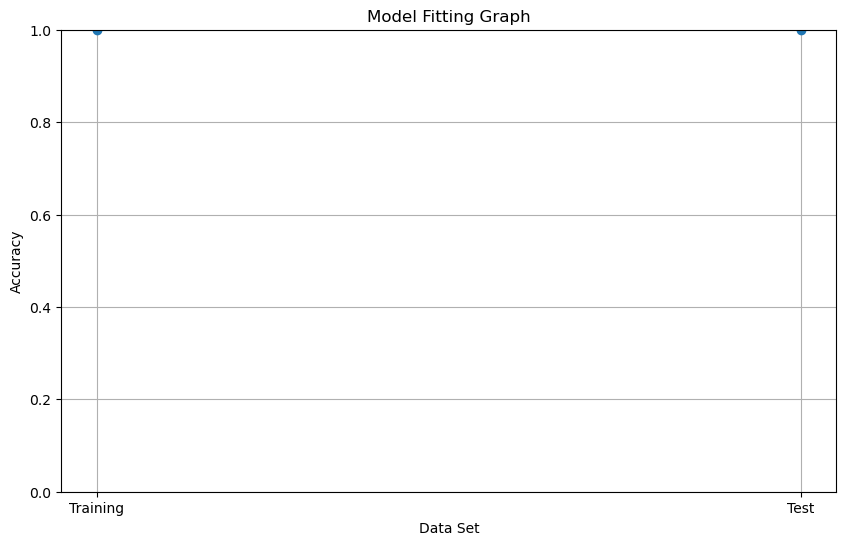

In [101]:
# Print the accuracies
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Plot the fitting graph
plt.figure(figsize=(10, 6))
plt.plot(['Training', 'Test'], [train_accuracy, test_accuracy], marker='o', linestyle='-')
plt.ylim(0, 1)
plt.title('Model Fitting Graph')
plt.xlabel('Data Set')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

### Other models to consider

1. Graph neural network
  - May be good for fraud rings, since they will be in clusters. 
  - GNNs good at detecting structural information in graphs, making them ideal for scenarios where relationships between features are more important.
2. Support vector machines.
  - The kernel trick can handle non-linear boundaries and may be goof for detecting outliers in the data. As shown above, very extreme values such as distance are likely strong indicators that a transaction is fraudulent.
3. Gradient boosting machine
  - They can be tuned for imbalanced datasets.
4. xg boost
  - Faster GBM that has features like regularization, which helps prevent overfitting and improves model generalization.

### Conclusion of first model

I believe there might be some overfitting occurring in my model, even though I’ve performed cross-validation. It’s possible that the training data is too similar to the test set, which might lead to the model performing exceptionally well on both but not generalizing effectively to new, unseen data.

Additionally, I’m concerned that the depth of the decision trees might be contributing to the issue. Deep decision trees can model very intricate patterns in the training data, but they can also capture noise and fluctuations specific to the training set rather than general trends. This high depth could be causing the model to overfit by learning these specific details rather than focusing on the broader patterns that would help it generalize better.

Additionally, I compared the random forest model to a logistic regression model using the same training and test data. The logistic regression model did not perform nearly as well, therefore I do not believe it is a data splitting error. 

### Training second model

For my next model, I will try XGBoost. It is an optimized implementation of gradient boosting that is very fast. Our credit card fraud dataset is quite imbalanced, with the number of legitimate transactions vastly outnumbering fraudulent ones. XGBoost will assign higher weights to the minority class (fraudulent transactions) to ensure they are treated with higher importance during training.

In [51]:
from xgboost import XGBClassifier

In [49]:
xgb = XGBClassifier(min_child_weight=1, max_depth=8, learning_rate=0.25, gamma=0.1, colsample_bytree=0.5, early_stopping_rounds=2)
xgb.fit(X_train, y_train, eval_set=[(X_test, y_test)])

[0]	validation_0-logloss:0.23043
[1]	validation_0-logloss:0.19195
[2]	validation_0-logloss:0.16889
[3]	validation_0-logloss:0.13981
[4]	validation_0-logloss:0.12254
[5]	validation_0-logloss:0.11648
[6]	validation_0-logloss:0.09704
[7]	validation_0-logloss:0.08961
[8]	validation_0-logloss:0.08461
[9]	validation_0-logloss:0.08018
[10]	validation_0-logloss:0.07615
[11]	validation_0-logloss:0.06868
[12]	validation_0-logloss:0.06290
[13]	validation_0-logloss:0.05816
[14]	validation_0-logloss:0.05659
[15]	validation_0-logloss:0.05389
[16]	validation_0-logloss:0.05066
[17]	validation_0-logloss:0.04878
[18]	validation_0-logloss:0.04012
[19]	validation_0-logloss:0.03857
[20]	validation_0-logloss:0.03500
[21]	validation_0-logloss:0.03170
[22]	validation_0-logloss:0.03077
[23]	validation_0-logloss:0.03017
[24]	validation_0-logloss:0.02937
[25]	validation_0-logloss:0.02837
[26]	validation_0-logloss:0.02669
[27]	validation_0-logloss:0.02550
[28]	validation_0-logloss:0.02322
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=2,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.25, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [50]:
y_pred = xgb.predict(X_train)
print("Train Score")
print(classification_report(y_train, y_pred))
y_pred = xgb.predict(X_test)
print("Test Score")
print(classification_report(y_test, y_pred))

Train Score
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    638818
         1.0       0.99      0.99      0.99     61182

    accuracy                           1.00    700000
   macro avg       1.00      1.00      1.00    700000
weighted avg       1.00      1.00      1.00    700000

Test Score
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    273779
         1.0       0.99      0.99      0.99     26221

    accuracy                           1.00    300000
   macro avg       0.99      1.00      0.99    300000
weighted avg       1.00      1.00      1.00    300000



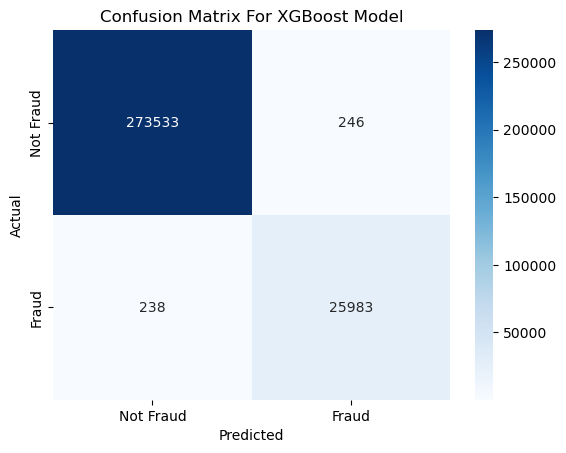

In [58]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Fraud', 'Fraud'], 
            yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix For XGBoost Model')
plt.show()

### XGBoost Evaluation

Given the confusion matrix, we can see 238 false negatives, which is pretty significant. Even though the classification report showed 0.99 or higher for all of the metrics, that is likely due to the large imbalance of the dataset. 

I will try oversampling on the minority class to try to detect more fraudulent transactions.

In [75]:
from imblearn.over_sampling import SMOTE, ADASYN

In [89]:
smote = SMOTE()
adasyn = ADASYN()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

In [91]:
display(y_train_smote.value_counts(), y_train_adasyn.value_counts())

0.0    638818
1.0    638818
Name: fraud, dtype: int64

1.0    638848
0.0    638818
Name: fraud, dtype: int64

In [92]:
xgb = XGBClassifier(min_child_weight=1, max_depth=8, learning_rate=0.25, gamma=0.1, colsample_bytree=0.5, early_stopping_rounds=2)

In [93]:
xgb.fit(X_train_smote, y_train_smote, eval_set=[(X_train_smote, y_train_smote)])
y_pred_smote = xgb.predict(X_test)

[0]	validation_0-logloss:0.55182
[1]	validation_0-logloss:0.47005
[2]	validation_0-logloss:0.42728
[3]	validation_0-logloss:0.34044
[4]	validation_0-logloss:0.29930
[5]	validation_0-logloss:0.28550
[6]	validation_0-logloss:0.23486
[7]	validation_0-logloss:0.21820
[8]	validation_0-logloss:0.20360
[9]	validation_0-logloss:0.19511
[10]	validation_0-logloss:0.18622
[11]	validation_0-logloss:0.16904
[12]	validation_0-logloss:0.15292
[13]	validation_0-logloss:0.14285
[14]	validation_0-logloss:0.14024
[15]	validation_0-logloss:0.13265
[16]	validation_0-logloss:0.12438
[17]	validation_0-logloss:0.11879
[18]	validation_0-logloss:0.09734
[19]	validation_0-logloss:0.09351
[20]	validation_0-logloss:0.08233
[21]	validation_0-logloss:0.07286
[22]	validation_0-logloss:0.07037
[23]	validation_0-logloss:0.06878
[24]	validation_0-logloss:0.06656
[25]	validation_0-logloss:0.06445
[26]	validation_0-logloss:0.05939
[27]	validation_0-logloss:0.05499
[28]	validation_0-logloss:0.05007
[29]	validation_0-loglos

In [94]:
xgb.fit(X_train_adasyn, y_train_adasyn, eval_set=[(X_train_adasyn, y_train_adasyn)])
y_pred_adasyn = xgb.predict(X_test)

[0]	validation_0-logloss:0.53538
[1]	validation_0-logloss:0.47969
[2]	validation_0-logloss:0.38575
[3]	validation_0-logloss:0.32381
[4]	validation_0-logloss:0.30262
[5]	validation_0-logloss:0.27661
[6]	validation_0-logloss:0.23980
[7]	validation_0-logloss:0.22934
[8]	validation_0-logloss:0.22078
[9]	validation_0-logloss:0.21771
[10]	validation_0-logloss:0.19934
[11]	validation_0-logloss:0.16934
[12]	validation_0-logloss:0.15053
[13]	validation_0-logloss:0.14443
[14]	validation_0-logloss:0.14376
[15]	validation_0-logloss:0.13250
[16]	validation_0-logloss:0.12811
[17]	validation_0-logloss:0.11977
[18]	validation_0-logloss:0.10276
[19]	validation_0-logloss:0.10071
[20]	validation_0-logloss:0.08607
[21]	validation_0-logloss:0.07803
[22]	validation_0-logloss:0.07416
[23]	validation_0-logloss:0.07155
[24]	validation_0-logloss:0.07019
[25]	validation_0-logloss:0.06891
[26]	validation_0-logloss:0.06369
[27]	validation_0-logloss:0.05745
[28]	validation_0-logloss:0.05349
[29]	validation_0-loglos

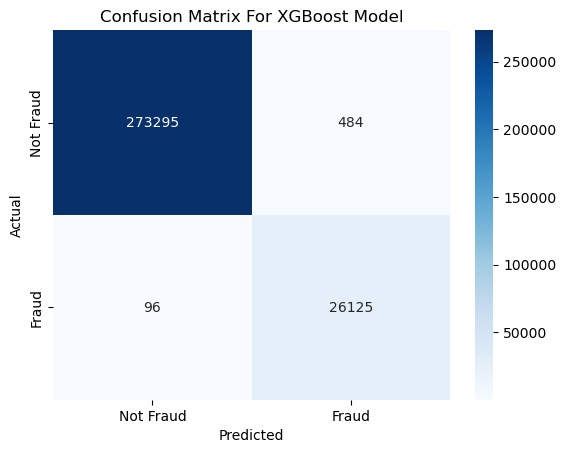

In [96]:
sns.heatmap(confusion_matrix(y_test, y_pred_smote), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Fraud', 'Fraud'], 
            yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix For XGBoost Model')
plt.show()

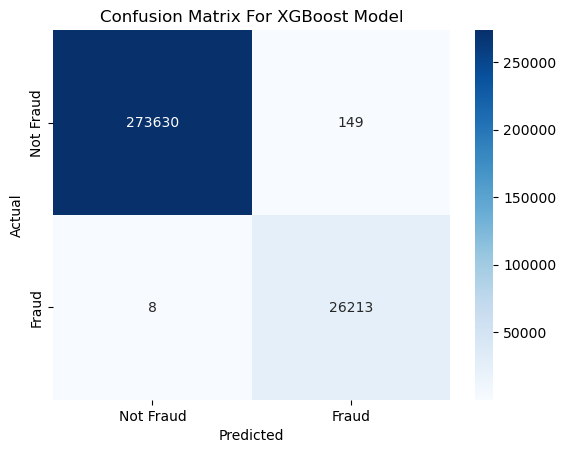

In [97]:
sns.heatmap(confusion_matrix(y_test, y_pred_adasyn), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Fraud', 'Fraud'], 
            yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix For XGBoost Model')
plt.show()

Training Accuracy: 0.9997
Test Accuracy: 0.9995


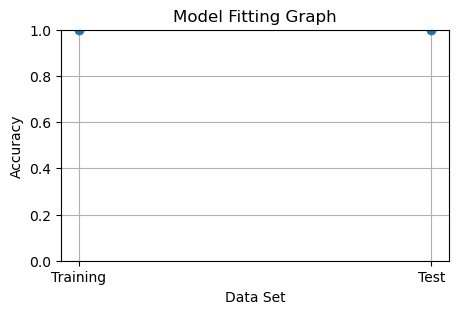

In [104]:
train_accuracy = accuracy_score(y_train, xgb.predict(X_train))
test_accuracy = accuracy_score(y_test, xgb.predict(X_test))

# Print the accuracies
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Plot the fitting graph
plt.figure(figsize=(5, 3))
plt.plot(['Training', 'Test'], [train_accuracy, test_accuracy], marker='o', linestyle='-')
plt.ylim(0, 1)
plt.title('Model Fitting Graph')
plt.xlabel('Data Set')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

### After oversampling XGBoost evaluation

I tried two oversampling techniques from the imbalanced-learn library; SMOTE and ADASYN. Both techniques aim to balance the dataset by generating synthetic samples for the minority class, helping to improve the model's performance in detecting fraud.

After training the XGBoost model on both resampled datasets, they performed much better in terms of recall. ADASYN managed to get below 10 false negatives. By prioritizing recall and effectively managing the trade-off with precision, this model becomes a reliable tool for minimizing undetected fraud.

As seen on the fitting graph, both the train and test accuracies are nearly 100%.

#### Hyperparameter tuning

Random search cv scored on recall

1. First try
    - Best parameters: {'min_child_weight': 1, 'max_depth': 8, 'learning_rate': 0.25, 'gamma': 0.1, 'colsample_bytree': 0.5}
    - Best score: 0.9912392207488174
    
(Commented out because it takes long to run)


In [48]:
# params = {
#  'learning_rate' : [0.05,0.10,0.15,0.20,0.25,0.30],
#  'max_depth' : [ 3, 4, 5, 6, 8, 10, 12, 15],
#  'min_child_weight' : [ 1, 3, 5, 7 ],
#  'gamma': [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
#  'colsample_bytree' : [ 0.3, 0.4, 0.5 , 0.7 ]
# }
# xgb = XGBClassifier()
# kf = StratifiedKFold(n_splits=10, shuffle=False)
# grid_xgv = RandomizedSearchCV(xgb, param_distributions=params, cv=kf, n_jobs=-1,
#                              scoring='recall', verbose=3).fit(X_train, y_train)
# print('Best parameters:', grid_xgv.best_params_)
# print('Best score:', grid_xgv.best_score_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best parameters: {'min_child_weight': 1, 'max_depth': 8, 'learning_rate': 0.25, 'gamma': 0.1, 'colsample_bytree': 0.5}
Best score: 0.9912392207488174
